In [ ]:
##### done

In [1]:
from pylab import rcParams
from xgboost import XGBClassifier
rcParams['figure.figsize'] = 10, 5
from plot_metric.functions import BinaryClassification
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report

/home/omar_totsso/.local/lib/python3.5/site-packages/xgboost/__init__.py:28: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [2]:
data= pd.read_csv('../data.csv')
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,...,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,228190.0,416746.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,99999999.0,741.0,2231892.0,29200.53,14.9,297996.0,750090.0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,206602.0,7290.0,896857.0,16367.74,17.3,215308.0,272448.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,217646.0,730.0,1184194.0,10855.08,19.6,122170.0,272052.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,548746.0,678.0,2559110.0,18660.28,22.6,437171.0,555038.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


In [3]:
data.dtypes

Current Loan Amount               float64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Current Credit Balance            float64
Maximum Open Credit               float64
Term_Short Term                     int64
Years in current job_10+ years      int64
Years in current job_2 years        int64
Years in current job_3 years        int64
Years in current job_4 years        int64
Years in current job_5 years        int64
Years in current job_6 years        int64
Years in current job_7 years        int64
Years in current job_8 years        int64
Years in current job_9 years        int64
Years in current job_< 1 year       int64
Home Ownership_Own Home             int64
Home Ownership_Rent                 int64
Loan Status                         int64
dtype: object

In [4]:
##copying data
data1=data.copy()

### spliting data en X et Y

In [5]:
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

### spliting the data to train and test

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### XGBoost

In [7]:
## converting Y_train & X_test & Y_train & Y_test to numpy array pour XGBoost
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [8]:
xgb= XGBClassifier()
params= {
        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13,14],
        'n_estimators' : [100, 300, 500, 800]
        }

##accuracy
grid_search_acc= GridSearchCV(estimator=xgb, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

----------
best parameters:  {'max_depth': 5, 'n_estimators': 100}
----------
[[ 1621  3331]
 [  368 13043]]
----------
              precision    recall  f1-score   support

           0       0.81      0.33      0.47      4952
           1       0.80      0.97      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.81      0.65      0.67     18363
weighted avg       0.80      0.80      0.77     18363

----------


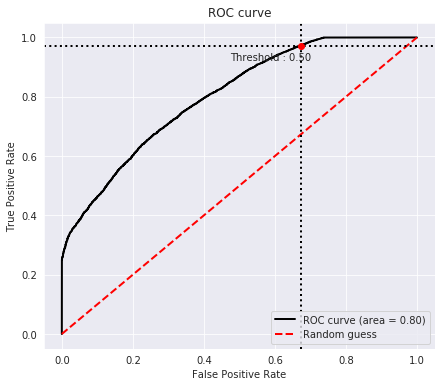

In [9]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

In [10]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=xgb, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [11]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'max_depth': 11, 'n_estimators': 500}
----------
[[ 1939  3013]
 [  927 12484]]
----------
              precision    recall  f1-score   support

           0       0.68      0.39      0.50      4952
           1       0.81      0.93      0.86     13411

    accuracy                           0.79     18363
   macro avg       0.74      0.66      0.68     18363
weighted avg       0.77      0.79      0.76     18363

----------


In [12]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=xgb, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [13]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'max_depth': 5, 'n_estimators': 100}
----------
[[ 1621  3331]
 [  368 13043]]
----------
              precision    recall  f1-score   support

           0       0.81      0.33      0.47      4952
           1       0.80      0.97      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.81      0.65      0.67     18363
weighted avg       0.80      0.80      0.77     18363

----------


In [14]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2))
    scores_mean= scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.845,0.867])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        #ax.plot(19, scores_mean[idx, -1:], '*', label= 'crt' + '=' + str(val) + ' & mx_dpt=None')
        
    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

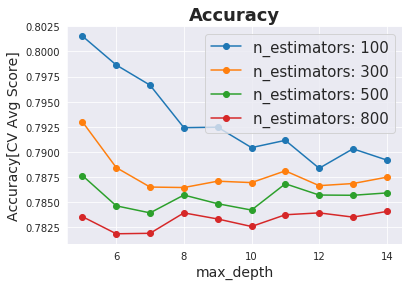

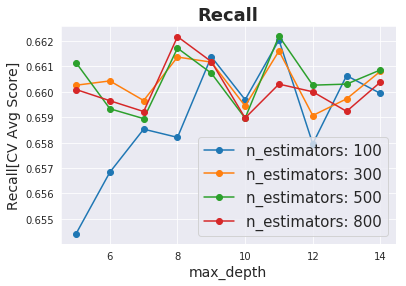

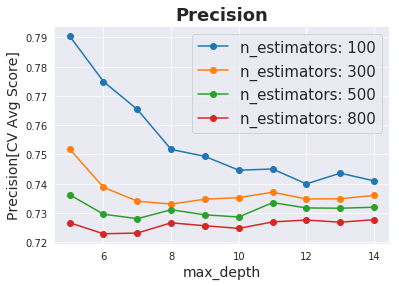

In [15]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['max_depth'], params['n_estimators'],  'max_depth', 'n_estimators', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['max_depth'], params['n_estimators'],  'max_depth', 'n_estimators', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['max_depth'], params['n_estimators'], 'max_depth', 'n_estimators', 'Precision')


In [16]:
##return index for dataframe
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['max_depth'], params['n_estimators'])

In [17]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                     'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)
        
## to excel
writer = pd.ExcelWriter('XGBoost.xlsx')
df.to_excel(writer, 'XGboost')
writer.save()
writer.close()

In [18]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[5, 100]",0.801517,0.790470,0.654412,0.000509
"[5, 300]",0.792998,0.751823,0.660260,0.001989
"[5, 500]",0.787653,0.736196,0.661148,0.001966
"[5, 800]",0.783569,0.726636,0.660092,0.001896
"[6, 100]",0.798646,0.774932,0.656836,0.002129
"[6, 300]",0.788447,0.738745,0.660429,0.002946
"[6, 500]",0.784642,0.729557,0.659334,0.002502
"[6, 800]",0.781865,0.722860,0.659650,0.001592
"[7, 100]",0.796639,0.765380,0.658531,0.001615
"[7, 300]",0.786509,0.734015,0.659658,0.000775


In [19]:
grid_search_acc.cv_results_



{'mean_fit_time': array([ 7.79121161, 23.59250474, 34.37133074, 49.45437872, 10.16165948,
        28.18774056, 39.29081094, 57.0964669 , 11.51612067, 26.73348296,
        36.43143713, 53.97723806,  7.74725187, 23.00973725, 38.24025357,
        60.60462046,  8.770473  , 25.90450191, 42.76777744, 67.68206513,
         9.74908888, 28.67993152, 47.36996841, 74.9026711 , 10.78677285,
        31.73274577, 51.85205448, 81.55938816, 11.88090301, 34.33202767,
        56.28396797, 81.72018528, 12.9283303 , 37.29201376, 56.77936769,
        76.58525014, 14.15320086, 34.91246378, 49.69532216, 69.26296246]),
 'mean_score_time': array([0.26419234, 0.69527268, 0.55719185, 0.89768326, 0.24082255,
        0.42233825, 0.66615272, 1.14477026, 0.32327008, 0.46028614,
        0.7705971 , 1.50994813, 0.19108868, 0.54971743, 0.98859835,
        2.11476588, 0.21437728, 0.64235961, 1.14770746, 2.60836101,
        0.23656654, 0.71177733, 1.37402296, 3.07837915, 0.25553608,
        0.81836307, 1.59160364, 3.2053